## NLP

### Syntax

- Entstehung von Struktur zwischen Wörtern (=Syntax) mit eigener Bedeutung
(über die Summe der Teile hinaus)
- Einordnung und Struktur
- Einordnung oder Kategorisierung von Sätzen, Phrasen, Wörtern usw.
- Strukturierung/Ordnung/Reihenfolge: Kombination zu jeweils längeren Blöcken
- Gesucht wird Strukturierung der Wörter.
- Oft: Hierarchische Strukturierung
• Satz
• Satzteil (Clause)
• Phrase
• Wort

### Semantik

- Bedeutung von Sprache
- Lexikalische Semantik:               Bedeutung von Wörtern oder Symbolen
- Kompositionelle Semantik:            Beziehungen zwischen Wörtern
- Bedeutung von Wortfolgen und Sätzen
- Beziehungen zwischen Sätzen

### Grammatik

https://pythonspot.com/nltk-speech-tagging/

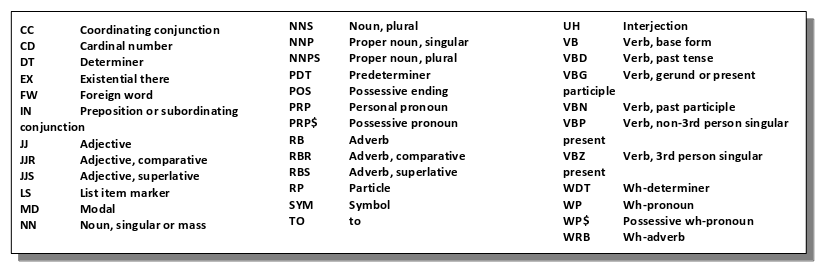

    Tag 	Meaning 	            English Examples
    ADJ 	adjective 	            new, good, high, special, big, local
    ADP 	adposition 	            on, of, at, with, by, into, under
    ADV 	adverb  	            really, already, still, early, now
    CONJ 	conjunction 	        and, or, but, if, while, although
    DET 	determiner, article 	the, a, some, most, every, no, which
    NOUN 	noun 	                year, home, costs, time, Africa
    NUM 	numeral 	            twenty-four, fourth, 1991, 14:24
    PRT 	particle 	            at, on, out, over per, that, up, with
    PRON 	pronoun 	            he, their, her, its, my, I, us
    VERB 	verb 	                is, say, told, given, playing, would
    . 	    punctuation marks 	    . , ; !
    X    	other 	                ersatz, esprit, dunno, gr8, univeristy
    
    Syntactic categories (common denotations) in NLP

    np - noun phrase
    vp - verb phrase
    s - sentence
    det - determiner (article)
    n - noun
    tv - transitive verb (takes an object)
    iv - intransitive verb
    prep - preposition
    pp - prepositional phrase

#### Grammatik für die Prüfung (kontextfreie Grammatik)

In [ ]:
text = "the brown fox is quick and he is jumping over the lazy dog"

In [ ]:
import nltk

grammar2 = nltk.CFG.fromstring(""" 
  S   -> HS CCNJ NS | HS
  HS  -> NP | NP VP | NP VP PP | NP VP ADJ
  NS  -> PRP VP PREP NP
  NP -> DET ADJ N PP | DET N | DET ADJ N
  PRP -> PR
  VP -> V | V V
  PP -> PREP NP
  N -> 'fox' | 'dog' | 'cat' | 'box'
  DET -> 'the' | 'a'
  ADJ  -> 'quick' | 'brown' |  'lazy' | 'tall' | "blue"
  V ->  'is'  | 'jumping' | 'running' | "jumps"
  PREP -> 'in' | "over"
  PR  -> "he" | "she" | "it"
  CCNJ -> "and" | "but" | "that" | "if"
  """)
words = text.split()
my_parser = nltk.RecursiveDescentParser(grammar2)  # (grammar2, trace=2) falls keine Ausgabe kommt...
for tree in my_parser.parse(words):  # man muss nicht unbedingt alle trees finden, manchmal genügt auch einer!!
    print(tree)
    


### Regular Expressions

In [ ]:
import re

Syntax
https://docs.python.org/3/library/re.html#regular-expression-syntax

- \d Matches any decimal digits (0,1,2,3,4,5,6,7,8,9).
- \D Matches any character that is not a decimal digit.
- \s Matches any whitespace character such as space, tab and newline.
- \S Matches any character that is not a whitespace.
- \w Matches any "word" character (letter, digit or the underscore).
- \W Matches any character that is not a "word" character.
- [...] Matches any character that listed inside square brackets. For example [abc] matches one character that is either a, b or c.
- [^...] Matches any character that is not listed inside square brackets. For example [^abc] matches one character that is NOT a, b or c.
- [0-9] Matches any character between 0 and 9. It is equivalent to using \d.
- [A-D] Matches any character between A and F (A, B, C, D).


- " + " Matches the previous item one or more times. For example, A+ will match strings such as A, AA, AAA and etc.
- " ? " Matches the previous item zero or one time. It is used to match an optional part of the pattern.
- " * " Matches the previous item zero or more time. It is used to match optional parts of the pattern.
- {n} Matches the previous item exactly n times. For example, A{2} will match strings such as AA.
- {n,m} Matches the previous item at least n times, but no more than m times. For example, A{2,5} will match strings such as AA, AAA, AAAA or AAAAA.
- {n,} Matches the previous item at least n or more times. For example, A{2,} will match strings such as AA, AAA, AAAA, AAAAA and so on.





### Übung Telefonnummern aus Text extrahieren

Probieren sie die Beispiele zu regulären Ausdrücken aus (Code von Sarkar, Ch2b).
Bilden sie einen regulären Ausdruck für Telefonnummern und testen sie diesen mittels selbstgewählter Beispiele. 
Sie sollen als Ziel (potentielle) Telefonnummern in beliebigem anderem Text erkennen und ausgeben können.

In [ ]:
import re

text = "Hallo, meine Telefonnummer ist 076 455 64 44. International ist es +41765123456 blah +41 76 588 99 44 Ich wohne in 0800 Zürich. Foo bar " \
         "076 666 75 53, blah 435345300555 +41(0)76998855 und 0041798226443"

pattern = '0+\d{2}\s?\d{3}\s?\d{2}\s?\d{2}|\+\d{2}\s?\d{2}\s?\d{3}\s?\d{2}\s?\d{2}'
pattern2 = '(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4})'
pattern3 = '((?:\+\d{2}[-\.\s]??|\d{4}[-\.\s]??)?(?:\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4}))'


print(re.findall(pattern, text))

### Übungsaufgabe Web-Scraping

Wir wollen das Web-Scraping auf einen eigenen Text anwenden und diesen entsprechend dem Vorbild aufbereiten. Dazu wählen wir die Bündner Verfassung. Diese ist beispielsweise hier erreichbar: http://www.verfassungen.ch/graubuenden/verf2003.htm (Bitte verwenden sie diese Quelle, auch wenn sie eine andere kennen sollten, damit wir alle auf der gleichen Grundlage arbeiten).

    Quelltext/HTML herunterladen
    Reinen Text extrahieren
    (gut aufbewahren, brauchen wir noch...)




In [ ]:
import re
from bs4 import BeautifulSoup
import requests

def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    [s.extract() for s in soup(['iframe', 'script'])]
    stripped_text = soup.get_text()
    stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text) #löscht Umbrüche und so Sachen
    return stripped_text

data = requests.get('http://www.verfassungen.ch/graubuenden/verf2003.htm')
content = data.content

clean_content = strip_html_tags(content)
print(clean_content[:])

### Stemming

#### Verfahren:
- Porter Stemmer
- Lancaster Stemmer
- Regex based Stemmer
- Snowball Stemmer
##### Vor/Nachteile
- Vorteil: regelbasiert, einfach, muss kein Wörterbuch aufgebaut werden
- Nachteil: ungenauer als Lemmatisierung


- Stemming gibt nicht zwingend richtiges Wort
- Lemma ist hingegen die Grundform eines Worter

In [ ]:
#Simple stemming hackt nur die Enden ab
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

simple_stemmer("My system keeps crashing his crashed yesterday, ours crashes daily")

#### Stemming für Prüfung

In [ ]:
# Porter Stemmer
from nltk.stem import PorterStemmer
ps = PorterStemmer()
# Lancaster Stemmer
from nltk.stem import LancasterStemmer
ls = LancasterStemmer()
# Regex based stemmer
from nltk.stem import RegexpStemmer
rs = RegexpStemmer('ing$|s$|ed$', min=4)
# Snowball Stemmer (auch für Deutsch, aber schneided nur Endung ab, 
# Stemmming geht nicht gut in Deutsch, besser lemmatisierung)
from nltk.stem import SnowballStemmer
ss = SnowballStemmer("german")

In [ ]:
text = "Hier die Wörter für das Stemming eingeben und staunen"
methode = ss

print(methode.stem(text))

### Lemmatisierung

#### mit NLTK

In [ ]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

In [ ]:
# lemmatize nouns
print(wnl.lemmatize('cars', 'n'))
print(wnl.lemmatize('men', 'n'))

# lemmatize verbs
print(wnl.lemmatize('running', 'v'))
print(wnl.lemmatize('ate', 'v'))

# lemmatize adjectives
print(wnl.lemmatize('saddest', 'a'))
print(wnl.lemmatize('fancier', 'a'))

#### mit Spacy

In [ ]:
import spacy
# use spacy.load('en') if you have downloaded the language model en directly after install spacy
nlp = spacy.load('en_core_web_sm')
text = 'My system keeps crashing his crashed yesterday, ours crashes daily'

def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

lemmatize_text("My system keeps crashing! his crashed yesterday, ours crashes daily")

#### Stopwörter entfernen

Nachteil: es geht potentiell wichtige Information verloren (und, oder, nicht…)

Wann und wofür: geeignet vor allem für statistische Analysen
z.B. Worthäufigkeiten: Klassifikation, Clusterbildung

## Normalisierung mit Text von Website oder von Text

#### von Text

In [34]:
text = "University of Applied Sciences of the Grisons is an innovative and entrepreneurial university of applied sciences with over 2,000 students. It trains people to become responsible and skilled professionals and managers. As a university of applied sciences with strong regional roots, University of Applied Sciences of the Grisons attracts students from beyond the canton and even from outside Switzerland with its welcoming atmosphere. University of Applied Sciences of the Grisons offers a range of bachelor’s, master’s and further education programmes in Architecture, Civil Engineering, Computational and Data Science, Digital Science, Digital Supply Chain, Management, Mobile Robotics, Multimedia Production, Photonics, Service Design and Tourism. It also performs applied research in these disciplines and in doing so contributes to the development of innovations, knowledge and solutions for society. University of Applied Sciences of the Grisons has been part of the University of Applied Sciences of Eastern Switzerland (FHO) since 2000. Following the Federal Council’s recognition of University of Applied Sciences of the Grisons’s qualification for financial support, it will become Switzerland’s eighth public university of applied sciences from 1 January 2020. University of Applied Sciences of the Grisons’s history dates back to 1963 with the foundation of the 'Abendtechnikum Chur', a technical college of evening courses."

In [35]:
language = "english"  #german or english

#### von Website

In [10]:
import requests
data = requests.get('http://www.verfassungen.ch/graubuenden/verf2003.htm')
text = data.content

In [11]:
language = "german"  #german or english

#### alle Funktionen auf einmal starten

In [57]:
import re
from bs4 import BeautifulSoup
import unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
import unicodedata
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import spacy


if language == "german":
    nlp = spacy.load('de_core_news_sm')
else:
    nlp = spacy.load('en_core_web_sm')
#nlp = spacy.load('en_core_web_sm')
#nlp = spacy.load('de_core_news_sm')   #conda install -c conda-forge spacy-model-de_core_news_sm 

def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words(language)
def remove_stopwords(text, is_lower_case=False, stopwords=stopword_list):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopwords]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    [s.extract() for s in soup(['iframe', 'script'])]
    stripped_text = soup.get_text()
    stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text) #löscht Umbrüche und so Sachen
    return stripped_text

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

from contractions import CONTRACTION_MAP

def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
 
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # expand contractions    
        #if contraction_expansion:
        #    doc = expand_contractions(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

#### Ausgabe

In [58]:
#print('Original:', text)
print('Normalisiert:', normalize_corpus([text])[0])

Normalisiert: university apply science grison innovative entrepreneurial university apply science student train people become responsible skilled professional manager university apply science strong regional root university apply science grison attract student beyond canton even outside switzerland welcome atmosphere university apply science grison offer range bachelor master education programme architecture civil engineering computational datum science digital science digital supply chain management mobile robotic multimedia production photonic service design tourism also perform applied research discipline contribute development innovation knowledge solution society university apply science grison part university apply science eastern switzerland fho since follow federal council recognition university apply science grisonss qualification financial support become switzerland eighth public university apply science january university apply science grisonss history date back foundation a

### Pos Tagger (Wortarterkennung) (NLP5.1)

In [19]:
import nltk

sentence = "US unveils world's most powerful supercomputer, beats China."
nltk_pos_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
print(f"Beispielsatz getaggt: {nltk_pos_tagged}")

Beispielsatz getaggt: [('US', 'NNP'), ('unveils', 'JJ'), ('world', 'NN'), ("'s", 'POS'), ('most', 'RBS'), ('powerful', 'JJ'), ('supercomputer', 'NN'), (',', ','), ('beats', 'VBZ'), ('China', 'NNP'), ('.', '.')]


In [20]:
from nltk.corpus import treebank
data = treebank.tagged_sents()
train_data = data[:3500]
test_data = data[3500:]
print(f"Satz aus den Trainingsdaten: {train_data[0]}")
print(f"Anzahl Sätze insgesamt: {len(data)}")

Satz aus den Trainingsdaten: [('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')]
Anzahl Sätze insgesamt: 3914


In [21]:
# default tagger, kann eigentlich nicht viel, tagt alles gleich
from nltk.tag import DefaultTagger
dt = DefaultTagger('NN')#nur Nomen...

# accuracy on test data - wir nutzen die eingebaute Methode evaluate...
print(f"Genauigkeit nur Nomen: {dt.evaluate(test_data)}")

# tagging our sample headline
print(f"Angewendet auf Beispielsatz: {dt.tag(nltk.word_tokenize(sentence))}")

Genauigkeit nur Nomen: 0.1454158195372253
Angewendet auf Beispielsatz: [('US', 'NN'), ('unveils', 'NN'), ('world', 'NN'), ("'s", 'NN'), ('most', 'NN'), ('powerful', 'NN'), ('supercomputer', 'NN'), (',', 'NN'), ('beats', 'NN'), ('China', 'NN'), ('.', 'NN')]


In [22]:
from nltk.tag import RegexpTagger #morphologie, fokus auf ende des worts
# define regex tag patterns
patterns = [
        (r'.*ing$', 'VBG'),               # gerunds
        (r'.*ed$', 'VBD'),                # simple past
        (r'.*es$', 'VBZ'),                # 3rd singular present
        (r'.*ould$', 'MD'),               # modals
        (r'.*\'s$', 'NN$'),               # possessive nouns
        (r'.*s$', 'NNS'),                 # plural nouns
        (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
        (r'.*', 'NN')                     # nouns (default) ...
]
rt = RegexpTagger(patterns)
# accuracy on test data
print(f"Genauigkeit Regex: {rt.evaluate(test_data)}")
# tagging our sample headline
print(f"Regex auf Beispielsatz: {rt.tag(nltk.word_tokenize(sentence))}")

Genauigkeit Regex: 0.24039113176493368
Regex auf Beispielsatz: [('US', 'NN'), ('unveils', 'NNS'), ('world', 'NN'), ("'s", 'NN$'), ('most', 'NN'), ('powerful', 'NN'), ('supercomputer', 'NN'), (',', 'NN'), ('beats', 'NNS'), ('China', 'NN'), ('.', 'NN')]


In [27]:
sentence = "US unveils world's most powerful supercomputer, beats China."
tagger = ut


## N gram taggers
from nltk.tag import UnigramTagger
from nltk.tag import BigramTagger
from nltk.tag import TrigramTagger

ut = UnigramTagger(train_data)
bt = BigramTagger(train_data)
tt = TrigramTagger(train_data)

# testing performance of unigram tagger
print(f"Genauigkeit: {tagger.evaluate(test_data)}")
print(f"Beispielsatz: {tagger.tag(nltk.word_tokenize(sentence))}")

Genauigkeit: 0.8607803272340013
Beispielsatz: [('US', 'NNP'), ('unveils', None), ('world', 'NN'), ("'s", 'POS'), ('most', 'JJS'), ('powerful', 'JJ'), ('supercomputer', 'NN'), (',', ','), ('beats', None), ('China', 'NNP'), ('.', '.')]


In [30]:
sentence = "US unveils world's most powerful supercomputer, beats China."

def combined_tagger(train_data, taggers, backoff=None):
    for tagger in taggers:
        backoff = tagger(train_data, backoff=backoff)
    return backoff

ct = combined_tagger(train_data=train_data,
                     taggers=[UnigramTagger, BigramTagger, TrigramTagger],
                     backoff=rt)


# evaluating the new combined tagger with backoff taggers
print(f"Genauigkeit Combined: {ct.evaluate(test_data)}")
print(f"Beispielsatz: {ct.tag(nltk.word_tokenize(sentence))}")

Genauigkeit Combined: 0.9094781682641108
Beispielsatz: [('US', 'NNP'), ('unveils', 'NNS'), ('world', 'NN'), ("'s", 'POS'), ('most', 'RBS'), ('powerful', 'JJ'), ('supercomputer', 'NN'), (',', ','), ('beats', 'NNS'), ('China', 'NNP'), ('.', '.')]


In [31]:
sentence = "US unveils world's most powerful supercomputer, beats China."


from nltk.classify import NaiveBayesClassifier
from nltk.tag.sequential import ClassifierBasedPOSTagger

nbt = ClassifierBasedPOSTagger(train=train_data,
                               classifier_builder=NaiveBayesClassifier.train)

# evaluate tagger on test data and sample sentence
print(f"Genauigkeit ML/Bayes: {nbt.evaluate(test_data)}")
print(f"Beispielsatz: {nbt.tag(nltk.word_tokenize(sentence))}")

Genauigkeit ML/Bayes: 0.9306806079969019
Beispielsatz: [('US', 'PRP'), ('unveils', 'VBZ'), ('world', 'VBN'), ("'s", 'POS'), ('most', 'JJS'), ('powerful', 'JJ'), ('supercomputer', 'NN'), (',', ','), ('beats', 'VBZ'), ('China', 'NNP'), ('.', '.')]


### Shallow Parsing (NLP5.2)

Methoden der Text-Strukturanalyse:
- Wortarterkennung/POS-Tagging
- «Flache» Syntaxanalyse/Shallow parsing, Chunking
-  Abhängigkeits-Syntaxanalyse/Dependency parsing
- Konstituenten-Syntaxanalyse/Constituency parsing

#### Chunking

In [32]:
# Shallow Parsing or Chunking
import nltk
from nltk.corpus import treebank_chunk

sentence = "you are not as smart as you think"

data = treebank_chunk.chunked_sents()

train_data = data[:3500]
test_data = data[3500:]
# view sample data
print(f"Beispielsatz aus Trainingsdaten: {train_data[7]}")

Beispielsatz aus Trainingsdaten: (S
  (NP A/DT Lorillard/NNP spokewoman/NN)
  said/VBD
  ,/,
  ``/``
  (NP This/DT)
  is/VBZ
  (NP an/DT old/JJ story/NN)
  ./.)


In [33]:
from nltk.chunk import RegexpParser

# get POS tagged sentence
tagged_simple_sent = nltk.pos_tag(nltk.word_tokenize(sentence))
print('POS Tags:', tagged_simple_sent)

# illustrate NP chunking based on explicit chunk patterns
chunk_grammar = """
NP: {<DT>?<JJ>*<NN.*>}
"""
rc = RegexpParser(chunk_grammar)
c = rc.parse(tagged_simple_sent)

# print and view chunked sentence using chunking
print(f"Regex NP chunking example: \n{c}")

POS Tags: [('you', 'PRP'), ('are', 'VBP'), ('not', 'RB'), ('as', 'RB'), ('smart', 'JJ'), ('as', 'IN'), ('you', 'PRP'), ('think', 'VBP')]
Regex NP chunking example: 
(S you/PRP are/VBP not/RB as/RB smart/JJ as/IN you/PRP think/VBP)


#### Chinking

In [ ]:
# illustrate NP chunking based on explicit chink patterns
chink_grammar = """
NP:
    {<.*>+}             # Chunk everything as NP
    }<VBZ|VBD|JJ|IN>+{  # Chink sequences of VBD/VBZ/JJ/IN
"""
rc = RegexpParser(chink_grammar)
c = rc.parse(tagged_simple_sent)

# print and view chunked sentence using chinking
print(f"Chunk/chink example:\n{c}")

In [ ]:
# create a more generic shallow parser


grammar = """
NP: {<DT>?<JJ>?<NN.*>}  
ADJP: {<JJ>}
ADVP: {<RB.*>}
PP: {<IN>}      
VP: {<MD>?<VB.*>+}
"""
rc = RegexpParser(grammar)
c = rc.parse(tagged_simple_sent)

# print and view shallow parsed sample sentence
print(f"Mehr Phrasen:\n{c}")

In [ ]:
# Evaluate parser performance on test data
print(f"Evaluation auf Testdaten: \n{rc.evaluate(test_data)}")

In [ ]:
#conll - Dateiformat im NLP, geht auf Conference on Natural Language Learning zurück
from nltk.chunk.util import tree2conlltags, conlltags2tree

# look at a sample training tagged sentence
train_sent = train_data[7]
print(f"Nochmal unser Beispielsatz aus den Trainingsdaten:\n{train_sent}")

In [ ]:
# get the (word, POS tag, Chunk tag) triples for each token
wtc = tree2conlltags(train_sent)
print(f"Tripel aus Wort, Tag, Chunk-Tag für den Beispielsatz:\n{wtc}")

In [ ]:
# get shallow parsed tree back from the WTC triples
tree = conlltags2tree(wtc)
print(f"Zusammenführung der Tripel zu Parse-Baum:\n{tree}")

In [ ]:
#tags und chunk-tags extrahieren, wörter verwerfen
def conll_tag_chunks(chunk_sents):
    tagged_sents = [tree2conlltags(tree) for tree in chunk_sents]
    return [[(t, c) for (w, t, c) in sent] for sent in tagged_sents]

In [ ]:
#Tagger sequentiell kombinieren (wie im POS-Beispiel)
def combined_tagger(train_data, taggers, backoff=None):
    for tagger in taggers:
        backoff = tagger(train_data, backoff=backoff)
    return backoff

In [ ]:
from nltk.tag import UnigramTagger, BigramTagger
from nltk.chunk import ChunkParserI


#eigenen Chunk-Algorithmus umsetzen, basierend auf bi- und uni-gram taggern
class NGramTagChunker(ChunkParserI):

    def __init__(self, train_sentences,
                 tagger_classes=[UnigramTagger, BigramTagger]):#beim Initialisieren wird der Chunker trainiert
        train_sent_tags = conll_tag_chunks(train_sentences)#pos-tags und chunk-tags extrahieren
        self.chunk_tagger = combined_tagger(train_sent_tags, tagger_classes)#chunk-tagger erstellen/trainieren

    def parse(self, tagged_sentence):#wendet den trainierten Chunk-Tagger auf neuen Satz an - Vorraussetzung: POS-Tags
        if not tagged_sentence:
            return None
        pos_tags = [tag for word, tag in tagged_sentence]#POS-Tags extrahieren/isolieren
        chunk_pos_tags = self.chunk_tagger.tag(pos_tags)#chunk-tags ermitteln, zusätzlich zu pos-tags
        chunk_tags = [chunk_tag for (pos_tag, chunk_tag) in chunk_pos_tags]#chunk-tags isolieren (eigentlich nicht notwendig)
        wpc_tags = [(word, pos_tag, chunk_tag) for ((word, pos_tag), chunk_tag)
                    in zip(tagged_sentence, chunk_tags)]#tag-tripel herstellen als Grundlage für die Parsebaum-Erstellung
        return conlltags2tree(wpc_tags)#Parsebaum zurückgeben


# train the shallow parser
ntc = NGramTagChunker(train_data)

# test parser performance on test data
print(f"Evaluation auf Testdaten: \n{ntc.evaluate(test_data)}")

In [ ]:
# parse our sample sentence
import spacy#wird nur für das pos-tagging gebraucht
nlp = spacy.load('en_core_web_sm')
sentence_nlp = nlp(sentence)#pos-tags ermitteln
tagged_sentence = [(word.text, word.tag_) for word in sentence_nlp]#eingabeformat für chunker erstellen
tree = ntc.parse(tagged_sentence)#beispielsatz parsen
print(f"Unser Beispielsatz: \n{tree}")

In [ ]:
#umfangreicherer Korpus, enthält Artikel des Wall Street Journals (wsj)
from nltk.corpus import conll2000

wsj_data = conll2000.chunked_sents()
train_wsj_data = wsj_data[:10000]
test_wsj_data = wsj_data[10000:]
# look at a sample sentence in the corpus
print(f"Beispielsatz aus dem WSJ-Korpus:\n{train_wsj_data[10]}")


# train the shallow parser
tc = NGramTagChunker(train_wsj_data)

In [ ]:
# test performance on the test data
print(f"Evaluation des neu trainierten Chunkers:\n{tc.evaluate(test_wsj_data)}")

In [ ]:
# parse our sample sentence
tree = tc.parse(tagged_sentence)
print(f"Unser Beispielsatz mit neuem Chunker:\n{tree}")

### Feature Engineering (NLP5.3)

Da Machine Learning Methoden auf Nummerik basieren,müssen textuelle Daten angepasst werden, um die Verfahren zu nutzen

In [45]:
#Ausschnitte aus dem Code von Sarkar
# teils korrigiert und ergänzt - siehe Anmerkungen und Kommentare

import warnings
warnings.filterwarnings('ignore')

In [46]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

pd.options.display.max_colwidth = 200
%matplotlib inline

In [47]:
corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
          'I love green eggs, ham, sausages and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!'
]
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']

corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus,
                          'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beautiful today,weather
7,The dog is lazy but the brown fox is quick!,animals


In [48]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

In [49]:
norm_corpus = normalize_corpus(corpus)
norm_corpus

array(['sky blue beautiful', 'love blue beautiful sky',
       'quick brown fox jumps lazy dog',
       'kings breakfast sausages ham bacon eggs toast beans',
       'love green eggs ham sausages bacon',
       'brown fox quick blue dog lazy', 'sky blue sky beautiful today',
       'dog lazy brown fox quick'], dtype='<U51')

In [50]:
#ohne vorher die Wörter zu zählen...

from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., norm='l2',
                     use_idf=True, smooth_idf=True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.38,0.38,0.00,0.38,0.00,0.00,0.53,0.00,0.38,0.00,0.38,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.37,0.00,0.42,0.42,0.00,0.42,0.00,0.00,0.00,0.00,0.42,0.00,0.42,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.00,0.00,0.00,0.0


In [51]:
#nur zum Vergleich: so wurden vorher die Werte berechnet (Sarkar)
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7
0,1.000000,0.820599,0.000000,0.000000,0.000000,0.192353,0.817246,0.000000
1,0.820599,1.000000,0.000000,0.000000,0.225489,0.157845,0.670631,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.791821,0.000000,0.850516
3,0.000000,0.000000,0.000000,1.000000,0.506866,0.000000,0.000000,0.000000
4,0.000000,0.225489,0.000000,0.506866,1.000000,0.000000,0.000000,0.000000
5,0.192353,0.157845,0.791821,0.000000,0.000000,1.000000,0.115488,0.930989
6,0.817246,0.670631,0.000000,0.000000,0.000000,0.115488,1.000000,0.000000
7,0.000000,0.000000,0.850516,0.000000,0.000000,0.930989,0.000000,1.000000


In [52]:
# Document Similarity - anderer Algorithmus pdist
#  dient als Eingabe für das linkage später
#  Hintergrund: linkage

from scipy.spatial.distance import pdist

similarity_matrix_pdist = pdist(tv_matrix, "cosine")
similarity_df_pdist = pd.DataFrame(similarity_matrix_pdist)
similarity_df_pdist #Darstellung flat array

,0
0,0.179401
1,1.000000
2,1.000000
3,1.000000
4,0.807647
5,0.182754
6,1.000000
7,1.000000
8,1.000000
9,0.774511


In [53]:
#bessere Darstellung erwünscht
from scipy.spatial.distance import squareform
pd.DataFrame(squareform(similarity_matrix_pdist))

#Wie man sieht, sind die Werte "invertiert" (1-x)
# das sind die Abstände

,0,1,2,3,4,5,6,7
0,0.000000,0.179401,1.000000,1.000000,1.000000,0.807647,0.182754,1.000000
1,0.179401,0.000000,1.000000,1.000000,0.774511,0.842155,0.329369,1.000000
2,1.000000,1.000000,0.000000,1.000000,1.000000,0.208179,1.000000,0.149484
3,1.000000,1.000000,1.000000,0.000000,0.493134,1.000000,1.000000,1.000000
4,1.000000,0.774511,1.000000,0.493134,0.000000,1.000000,1.000000,1.000000
5,0.807647,0.842155,0.208179,1.000000,1.000000,0.000000,0.884512,0.069011
6,0.182754,0.329369,1.000000,1.000000,1.000000,0.884512,0.000000,1.000000
7,1.000000,1.000000,0.149484,1.000000,1.000000,0.069011,1.000000,0.000000


In [54]:
from scipy.cluster.hierarchy import dendrogram, linkage

#wir können wie besprochen "ward" nicht verwenden
# also probieren wir eine andere Methode aus: single link

Z = linkage(similarity_matrix_pdist, 'single')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2',
                         'Distance', 'Cluster Size'], dtype='object')

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,5.0,7.0,0.069011,2.0
1,2.0,8.0,0.149484,3.0
2,0.0,1.0,0.179401,2.0
3,6.0,10.0,0.182754,3.0
4,3.0,4.0,0.493134,2.0
5,11.0,12.0,0.774511,5.0
6,9.0,13.0,0.807647,8.0


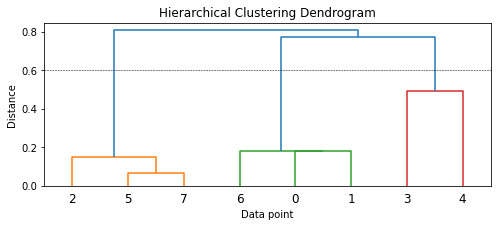

In [55]:
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=0.6, c='k', ls='--', lw=0.5)
#plt.savefig("K:/Documents/Lehre/KE/cluster-pdist-single")


### Spam Klassifikation mit Naive Bayes (NLP6)

In [56]:
#Listen mit den Dokumentnamen

dnames = os.listdir("C:\\Users\micou\OneDrive\Studium\2021 FHGR\2. Semester\NLP\Notebooks\enron\enron1\ham")
dnamesSP = os.listdir("C:\\Users\micou\OneDrive\Studium\2021 FHGR\2. Semester\NLP\Notebooks\enron\enron1\ham")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 54-55: malformed \N character escape (Temp/ipykernel_26508/3694022418.py, line 3)

In [41]:
#Dokumente einlesen

maillist = []

for dat in dnames: 
    with open("C:\\Users\micou\OneDrive\Studium\2021 FHGR\2. Semester\NLP\Notebooks\enron1\enron1\ham\" + dat, encoding = 'utf-8') as f:
        mail = f.read()
        maillist.append(mail)


SyntaxError: EOL while scanning string literal (Temp/ipykernel_26508/3532819756.py, line 6)

In [ ]:
maillistSPAM = []        

for dat in dnamesSP: 

    with open("C:\\Users\micou\OneDrive\Studium\2021 FHGR\2. Semester\NLP\Notebooks\enron1\enron1\ham\" + dat, encoding = 'utf-8') as f:
        mail = f.read()
        maillistSPAM.append(mail)

In [ ]:
#Normalisieren der Mails

import nltk
import numpy as np
import re

wpt = nltk.WordPunctTokenizer()

stop_words = nltk.corpus.stopwords.words('english')

In [ ]:
def normalize_document(doc):

    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_mails = np.vectorize(normalize_document)
norm_mails = normalize_mails(maillist)
norm_SPAM = normalize_mails(maillistSPAM)

In [ ]:
#Tokenizing
mail_words = []
GAP_PATTERN = r'\s+'
regex_wt = nltk.RegexpTokenizer(pattern=GAP_PATTERN, gaps=True)
  
for mail in norm_mails:
    words = regex_wt.tokenize(mail)
    mail_words.append(words)

SPAM_words = []

for mail in norm_SPAM:
    words = regex_wt.tokenize(mail)
    SPAM_words.append(words)

In [ ]:
# Liste für den Classifier erstellen
list_dic = []

for mail in mail_words:
    dic = {}
    for word in mail:
        dic[word] = True
    list_dic.append((dic, "ham"))      
list_dic

for mail in norm_SPAM:
    dic = {}
    for word in mail:
        dic[word] = True
    list_dic.append((dic, "spam"))  

list_dic

In [ ]:
#ham und spam mischen 

import random
random.shuffle(list_dic)

In [ ]:
#Trainings- und Testdaten teilen
# print(len(list_dic)) = 5172

training = list_dic[0:4000]
test = list_dic[4000:]

from nltk import NaiveBayesClassifier, classify
classifier = NaiveBayesClassifier.train(training)
classify.accuracy(classifier, test)
#Resultat = 1.0 --> zu hoch

classifier.show_most_informative_features()

#Ausgabe der features ergibt, dass der Classifier vor allem einzelne Buchstaben als Indiz für Spam genommen hat. 
#Eine kurze Recherche ergab, dass es beim Tokenizing wohl noch ein paar Fehler gibt, da dort einzelne Buchstaben als Wörter extrahiert wurden. 
#Tokenizer müsste also noch optimiert werden.

### Übungsaufgaben

häufigste Wörter zählen

In [141]:
normalisierter_text = "university applied sciences grisons innovative entrepreneurial university applied sciences students trains people become responsible skilled professionals managers university applied sciences strong regional roots university applied sciences grisons attracts students beyond canton even outside switzerland welcoming atmosphere university applied sciences grisons offers range bachelors masters education programmes architecture civil engineering computational data science digital science digital supply chain management mobile robotics multimedia production photonics service design tourism also performs applied research disciplines contributes development innovations knowledge solutions society university applied sciences grisons part university applied sciences eastern switzerland fho since following federal councils recognition university applied sciences grisonss qualification financial support become switzerlands eighth public university applied sciences january university applied sciences grisonss history dates back foundation abendtechnikum chur technical college evening courses"

In [142]:
# Python code to find frequency of each word

liste = []

def freq(str):
    # break the string into list of words 
    str = str.split()         
    str2 = []
    # loop till string values present in list str
    for i in str:             
        # checking for the duplicacy
        if i not in str2:
            # insert value in str2
            str2.append(i) 
       
    for i in range(0, len(str2)):
        word = (str.count(str2[i]), str2[i])
        liste.append(word)
        # count the frequency of each word(present in str2) in str and print
        #list(str.count(str2[i]), str2[i])

In [143]:
freq(normalisierter_text)

In [152]:
liste.sort().reverse()
liste[:5]

AttributeError: 'NoneType' object has no attribute 'reverse'